# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.71s)
creating index...
index created!
loading annotations into memory...
Done (t=0.51s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000160233.jpg


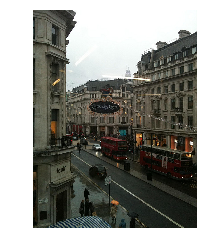

A couple of double deck tour buses parked at a street side.
A couple of buses that are sitting in front of a building.
A street with two buses parked on the side.
Two double decker buses drive down a street near tall buildings.
A road is lined with buildings and has cars on it.


In [2]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)

In [5]:
!ls /opt/cocoapi/images/train2014/

COCO_train2014_000000000009.jpg  COCO_train2014_000000291822.jpg
COCO_train2014_000000000025.jpg  COCO_train2014_000000291825.jpg
COCO_train2014_000000000030.jpg  COCO_train2014_000000291827.jpg
COCO_train2014_000000000034.jpg  COCO_train2014_000000291839.jpg
COCO_train2014_000000000036.jpg  COCO_train2014_000000291841.jpg
COCO_train2014_000000000049.jpg  COCO_train2014_000000291854.jpg
COCO_train2014_000000000061.jpg  COCO_train2014_000000291855.jpg
COCO_train2014_000000000064.jpg  COCO_train2014_000000291865.jpg
COCO_train2014_000000000071.jpg  COCO_train2014_000000291868.jpg
COCO_train2014_000000000072.jpg  COCO_train2014_000000291873.jpg
COCO_train2014_000000000077.jpg  COCO_train2014_000000291889.jpg
COCO_train2014_000000000078.jpg  COCO_train2014_000000291894.jpg
COCO_train2014_000000000081.jpg  COCO_train2014_000000291897.jpg
COCO_train2014_000000000086.jpg  COCO_train2014_000000291898.jpg
COCO_train2014_000000000089.jpg  COCO_train2014_000000291911.jpg
COCO_train2014_0000000000

COCO_train2014_000000032984.jpg  COCO_train2014_000000324669.jpg
COCO_train2014_000000032985.jpg  COCO_train2014_000000324677.jpg
COCO_train2014_000000032986.jpg  COCO_train2014_000000324682.jpg
COCO_train2014_000000032997.jpg  COCO_train2014_000000324688.jpg
COCO_train2014_000000033009.jpg  COCO_train2014_000000324689.jpg
COCO_train2014_000000033017.jpg  COCO_train2014_000000324692.jpg
COCO_train2014_000000033034.jpg  COCO_train2014_000000324697.jpg
COCO_train2014_000000033042.jpg  COCO_train2014_000000324699.jpg
COCO_train2014_000000033047.jpg  COCO_train2014_000000324705.jpg
COCO_train2014_000000033057.jpg  COCO_train2014_000000324706.jpg
COCO_train2014_000000033068.jpg  COCO_train2014_000000324708.jpg
COCO_train2014_000000033074.jpg  COCO_train2014_000000324709.jpg
COCO_train2014_000000033077.jpg  COCO_train2014_000000324713.jpg
COCO_train2014_000000033091.jpg  COCO_train2014_000000324717.jpg
COCO_train2014_000000033093.jpg  COCO_train2014_000000324730.jpg
COCO_train2014_0000000330

COCO_train2014_000000067248.jpg  COCO_train2014_000000358079.jpg
COCO_train2014_000000067256.jpg  COCO_train2014_000000358081.jpg
COCO_train2014_000000067259.jpg  COCO_train2014_000000358083.jpg
COCO_train2014_000000067261.jpg  COCO_train2014_000000358085.jpg
COCO_train2014_000000067262.jpg  COCO_train2014_000000358088.jpg
COCO_train2014_000000067269.jpg  COCO_train2014_000000358100.jpg
COCO_train2014_000000067271.jpg  COCO_train2014_000000358104.jpg
COCO_train2014_000000067297.jpg  COCO_train2014_000000358113.jpg
COCO_train2014_000000067320.jpg  COCO_train2014_000000358118.jpg
COCO_train2014_000000067331.jpg  COCO_train2014_000000358134.jpg
COCO_train2014_000000067334.jpg  COCO_train2014_000000358158.jpg
COCO_train2014_000000067339.jpg  COCO_train2014_000000358171.jpg
COCO_train2014_000000067344.jpg  COCO_train2014_000000358172.jpg
COCO_train2014_000000067347.jpg  COCO_train2014_000000358174.jpg
COCO_train2014_000000067355.jpg  COCO_train2014_000000358176.jpg
COCO_train2014_0000000673

COCO_train2014_000000100095.jpg  COCO_train2014_000000391033.jpg
COCO_train2014_000000100124.jpg  COCO_train2014_000000391041.jpg
COCO_train2014_000000100128.jpg  COCO_train2014_000000391046.jpg
COCO_train2014_000000100140.jpg  COCO_train2014_000000391053.jpg
COCO_train2014_000000100142.jpg  COCO_train2014_000000391063.jpg
COCO_train2014_000000100157.jpg  COCO_train2014_000000391065.jpg
COCO_train2014_000000100159.jpg  COCO_train2014_000000391074.jpg
COCO_train2014_000000100169.jpg  COCO_train2014_000000391084.jpg
COCO_train2014_000000100177.jpg  COCO_train2014_000000391088.jpg
COCO_train2014_000000100182.jpg  COCO_train2014_000000391101.jpg
COCO_train2014_000000100202.jpg  COCO_train2014_000000391102.jpg
COCO_train2014_000000100207.jpg  COCO_train2014_000000391106.jpg
COCO_train2014_000000100209.jpg  COCO_train2014_000000391113.jpg
COCO_train2014_000000100222.jpg  COCO_train2014_000000391116.jpg
COCO_train2014_000000100223.jpg  COCO_train2014_000000391117.jpg
COCO_train2014_0000001002

COCO_train2014_000000127834.jpg  COCO_train2014_000000418844.jpg
COCO_train2014_000000127839.jpg  COCO_train2014_000000418847.jpg
COCO_train2014_000000127841.jpg  COCO_train2014_000000418853.jpg
COCO_train2014_000000127843.jpg  COCO_train2014_000000418868.jpg
COCO_train2014_000000127855.jpg  COCO_train2014_000000418873.jpg
COCO_train2014_000000127856.jpg  COCO_train2014_000000418885.jpg
COCO_train2014_000000127863.jpg  COCO_train2014_000000418894.jpg
COCO_train2014_000000127866.jpg  COCO_train2014_000000418912.jpg
COCO_train2014_000000127869.jpg  COCO_train2014_000000418927.jpg
COCO_train2014_000000127871.jpg  COCO_train2014_000000418929.jpg
COCO_train2014_000000127882.jpg  COCO_train2014_000000418935.jpg
COCO_train2014_000000127892.jpg  COCO_train2014_000000418938.jpg
COCO_train2014_000000127893.jpg  COCO_train2014_000000418958.jpg
COCO_train2014_000000127899.jpg  COCO_train2014_000000418964.jpg
COCO_train2014_000000127905.jpg  COCO_train2014_000000418968.jpg
COCO_train2014_0000001279

COCO_train2014_000000156914.jpg  COCO_train2014_000000447839.jpg
COCO_train2014_000000156939.jpg  COCO_train2014_000000447840.jpg
COCO_train2014_000000156943.jpg  COCO_train2014_000000447849.jpg
COCO_train2014_000000156955.jpg  COCO_train2014_000000447862.jpg
COCO_train2014_000000156958.jpg  COCO_train2014_000000447863.jpg
COCO_train2014_000000156963.jpg  COCO_train2014_000000447865.jpg
COCO_train2014_000000156969.jpg  COCO_train2014_000000447877.jpg
COCO_train2014_000000156977.jpg  COCO_train2014_000000447879.jpg
COCO_train2014_000000156985.jpg  COCO_train2014_000000447883.jpg
COCO_train2014_000000156986.jpg  COCO_train2014_000000447885.jpg
COCO_train2014_000000157006.jpg  COCO_train2014_000000447891.jpg
COCO_train2014_000000157016.jpg  COCO_train2014_000000447902.jpg
COCO_train2014_000000157017.jpg  COCO_train2014_000000447907.jpg
COCO_train2014_000000157020.jpg  COCO_train2014_000000447911.jpg
COCO_train2014_000000157026.jpg  COCO_train2014_000000447913.jpg
COCO_train2014_0000001570

COCO_train2014_000000183562.jpg  COCO_train2014_000000474256.jpg
COCO_train2014_000000183585.jpg  COCO_train2014_000000474268.jpg
COCO_train2014_000000183588.jpg  COCO_train2014_000000474271.jpg
COCO_train2014_000000183594.jpg  COCO_train2014_000000474279.jpg
COCO_train2014_000000183597.jpg  COCO_train2014_000000474283.jpg
COCO_train2014_000000183602.jpg  COCO_train2014_000000474289.jpg
COCO_train2014_000000183603.jpg  COCO_train2014_000000474315.jpg
COCO_train2014_000000183611.jpg  COCO_train2014_000000474319.jpg
COCO_train2014_000000183617.jpg  COCO_train2014_000000474330.jpg
COCO_train2014_000000183626.jpg  COCO_train2014_000000474331.jpg
COCO_train2014_000000183642.jpg  COCO_train2014_000000474342.jpg
COCO_train2014_000000183645.jpg  COCO_train2014_000000474353.jpg
COCO_train2014_000000183646.jpg  COCO_train2014_000000474356.jpg
COCO_train2014_000000183653.jpg  COCO_train2014_000000474363.jpg
COCO_train2014_000000183658.jpg  COCO_train2014_000000474369.jpg
COCO_train2014_0000001836

COCO_train2014_000000210249.jpg  COCO_train2014_000000500179.jpg
COCO_train2014_000000210251.jpg  COCO_train2014_000000500183.jpg
COCO_train2014_000000210252.jpg  COCO_train2014_000000500190.jpg
COCO_train2014_000000210258.jpg  COCO_train2014_000000500194.jpg
COCO_train2014_000000210259.jpg  COCO_train2014_000000500196.jpg
COCO_train2014_000000210266.jpg  COCO_train2014_000000500207.jpg
COCO_train2014_000000210267.jpg  COCO_train2014_000000500212.jpg
COCO_train2014_000000210271.jpg  COCO_train2014_000000500214.jpg
COCO_train2014_000000210275.jpg  COCO_train2014_000000500224.jpg
COCO_train2014_000000210279.jpg  COCO_train2014_000000500226.jpg
COCO_train2014_000000210286.jpg  COCO_train2014_000000500228.jpg
COCO_train2014_000000210296.jpg  COCO_train2014_000000500233.jpg
COCO_train2014_000000210322.jpg  COCO_train2014_000000500265.jpg
COCO_train2014_000000210333.jpg  COCO_train2014_000000500267.jpg
COCO_train2014_000000210344.jpg  COCO_train2014_000000500271.jpg
COCO_train2014_0000002103

COCO_train2014_000000234577.jpg  COCO_train2014_000000524709.jpg
COCO_train2014_000000234599.jpg  COCO_train2014_000000524710.jpg
COCO_train2014_000000234600.jpg  COCO_train2014_000000524718.jpg
COCO_train2014_000000234603.jpg  COCO_train2014_000000524723.jpg
COCO_train2014_000000234612.jpg  COCO_train2014_000000524724.jpg
COCO_train2014_000000234615.jpg  COCO_train2014_000000524730.jpg
COCO_train2014_000000234616.jpg  COCO_train2014_000000524736.jpg
COCO_train2014_000000234624.jpg  COCO_train2014_000000524763.jpg
COCO_train2014_000000234637.jpg  COCO_train2014_000000524766.jpg
COCO_train2014_000000234642.jpg  COCO_train2014_000000524773.jpg
COCO_train2014_000000234649.jpg  COCO_train2014_000000524777.jpg
COCO_train2014_000000234653.jpg  COCO_train2014_000000524786.jpg
COCO_train2014_000000234655.jpg  COCO_train2014_000000524788.jpg
COCO_train2014_000000234665.jpg  COCO_train2014_000000524790.jpg
COCO_train2014_000000234666.jpg  COCO_train2014_000000524802.jpg
COCO_train2014_0000002346

COCO_train2014_000000257071.jpg  COCO_train2014_000000547770.jpg
COCO_train2014_000000257073.jpg  COCO_train2014_000000547774.jpg
COCO_train2014_000000257090.jpg  COCO_train2014_000000547777.jpg
COCO_train2014_000000257099.jpg  COCO_train2014_000000547794.jpg
COCO_train2014_000000257102.jpg  COCO_train2014_000000547795.jpg
COCO_train2014_000000257105.jpg  COCO_train2014_000000547796.jpg
COCO_train2014_000000257109.jpg  COCO_train2014_000000547797.jpg
COCO_train2014_000000257117.jpg  COCO_train2014_000000547807.jpg
COCO_train2014_000000257118.jpg  COCO_train2014_000000547808.jpg
COCO_train2014_000000257134.jpg  COCO_train2014_000000547817.jpg
COCO_train2014_000000257149.jpg  COCO_train2014_000000547827.jpg
COCO_train2014_000000257162.jpg  COCO_train2014_000000547830.jpg
COCO_train2014_000000257163.jpg  COCO_train2014_000000547837.jpg
COCO_train2014_000000257164.jpg  COCO_train2014_000000547845.jpg
COCO_train2014_000000257165.jpg  COCO_train2014_000000547846.jpg
COCO_train2014_0000002571

COCO_train2014_000000278797.jpg  COCO_train2014_000000568854.jpg
COCO_train2014_000000278799.jpg  COCO_train2014_000000568869.jpg
COCO_train2014_000000278816.jpg  COCO_train2014_000000568872.jpg
COCO_train2014_000000278823.jpg  COCO_train2014_000000568873.jpg
COCO_train2014_000000278858.jpg  COCO_train2014_000000568878.jpg
COCO_train2014_000000278860.jpg  COCO_train2014_000000568880.jpg
COCO_train2014_000000278870.jpg  COCO_train2014_000000568884.jpg
COCO_train2014_000000278907.jpg  COCO_train2014_000000568886.jpg
COCO_train2014_000000278910.jpg  COCO_train2014_000000568895.jpg
COCO_train2014_000000278913.jpg  COCO_train2014_000000568927.jpg
COCO_train2014_000000278921.jpg  COCO_train2014_000000568947.jpg
COCO_train2014_000000278922.jpg  COCO_train2014_000000568948.jpg
COCO_train2014_000000278923.jpg  COCO_train2014_000000568952.jpg
COCO_train2014_000000278931.jpg  COCO_train2014_000000568955.jpg
COCO_train2014_000000278936.jpg  COCO_train2014_000000568962.jpg
COCO_train2014_0000002789